# Import & Pre-Processing Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/ngoding/freelance/nadya-curah-hujan/kemayoran 2000-2022.xlsx')

In [ ]:
df

,Tanggal,RR
0,01-01-2000,9.1
1,02-01-2000,8888.0
2,03-01-2000,8888.0
3,04-01-2000,50.2
4,05-01-2000,1.6
...,...,...
8151,26-04-2022,26.4
8152,27-04-2022,8888.0
8153,28-04-2022,7.5
8154,29-04-2022,8888.0


In [ ]:
df[['tanggal', 'bulan', 'tahun']] = df['Tanggal'].str.split('-', expand=True)
df['tahun_bulan'] = df['tahun'] + '-' + df['bulan']

In [ ]:
df

,Tanggal,RR,tanggal,bulan,tahun,tahun_bulan
0,01-01-2000,9.1,01,01,2000,2000-01
1,02-01-2000,8888.0,02,01,2000,2000-01
2,03-01-2000,8888.0,03,01,2000,2000-01
3,04-01-2000,50.2,04,01,2000,2000-01
4,05-01-2000,1.6,05,01,2000,2000-01
...,...,...,...,...,...,...
8151,26-04-2022,26.4,26,04,2022,2022-04
8152,27-04-2022,8888.0,27,04,2022,2022-04
8153,28-04-2022,7.5,28,04,2022,2022-04
8154,29-04-2022,8888.0,29,04,2022,2022-04


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8156 entries, 0 to 8155
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Tanggal      8156 non-null   object 
 1   RR           7883 non-null   float64
 2   tanggal      8156 non-null   object 
 3   bulan        8156 non-null   object 
 4   tahun        8156 non-null   object 
 5   tahun_bulan  8156 non-null   object 
dtypes: float64(1), object(5)
memory usage: 382.4+ KB


In [ ]:
df.groupby('tahun_bulan')['RR'].apply(np.mean)

tahun_bulan
2000-01    1445.958065
2000-02     623.648276
2000-03     289.945161
2000-04    1193.660000
2000-05     291.012903
              ...     
2021-12    1428.944000
2022-01     648.321429
2022-02     369.032000
2022-03       6.286364
2022-04    1377.319231
Name: RR, Length: 268, dtype: float64

In [ ]:
avg_data = pd.DataFrame(df.groupby('tahun_bulan')['RR'].apply(np.mean))

In [ ]:
avg_data

,RR
tahun_bulan,
2000-01,1445.958065
2000-02,623.648276
2000-03,289.945161
2000-04,1193.660000
2000-05,291.012903
...,...
2021-12,1428.944000
2022-01,648.321429
2022-02,369.032000


In [ ]:
avg_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 2000-01 to 2022-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RR      268 non-null    float64
dtypes: float64(1)
memory usage: 4.2+ KB


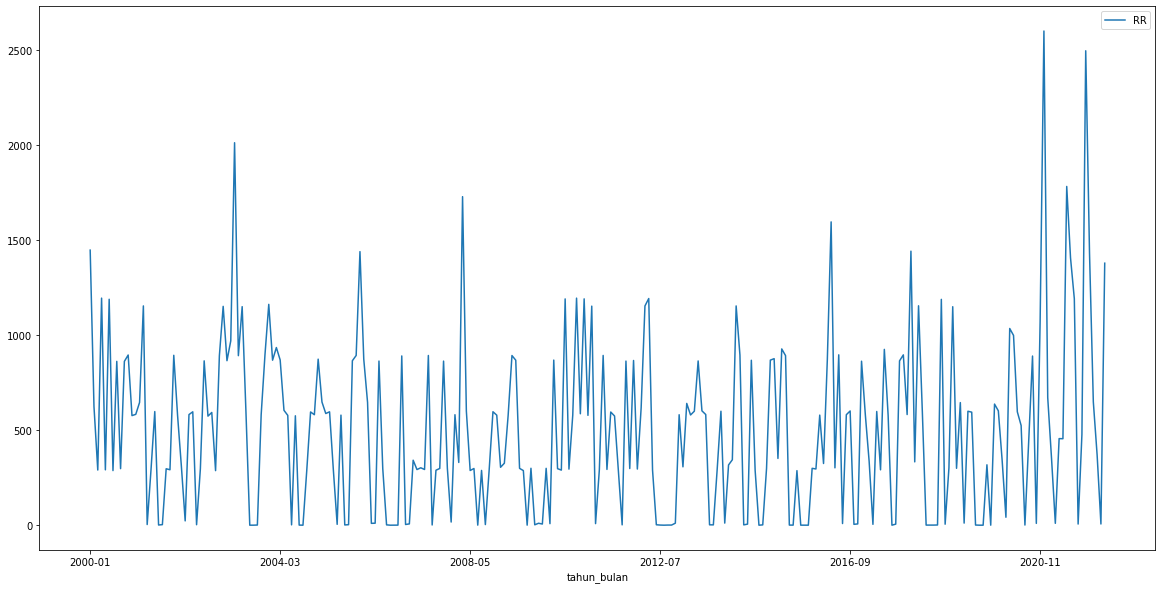

In [ ]:
import matplotlib.pyplot as plt

avg_data.plot()
plt.show()

#Modelling Arima (berhasil)

In [ ]:
df = avg_data

In [ ]:
testing = df.tail(12)

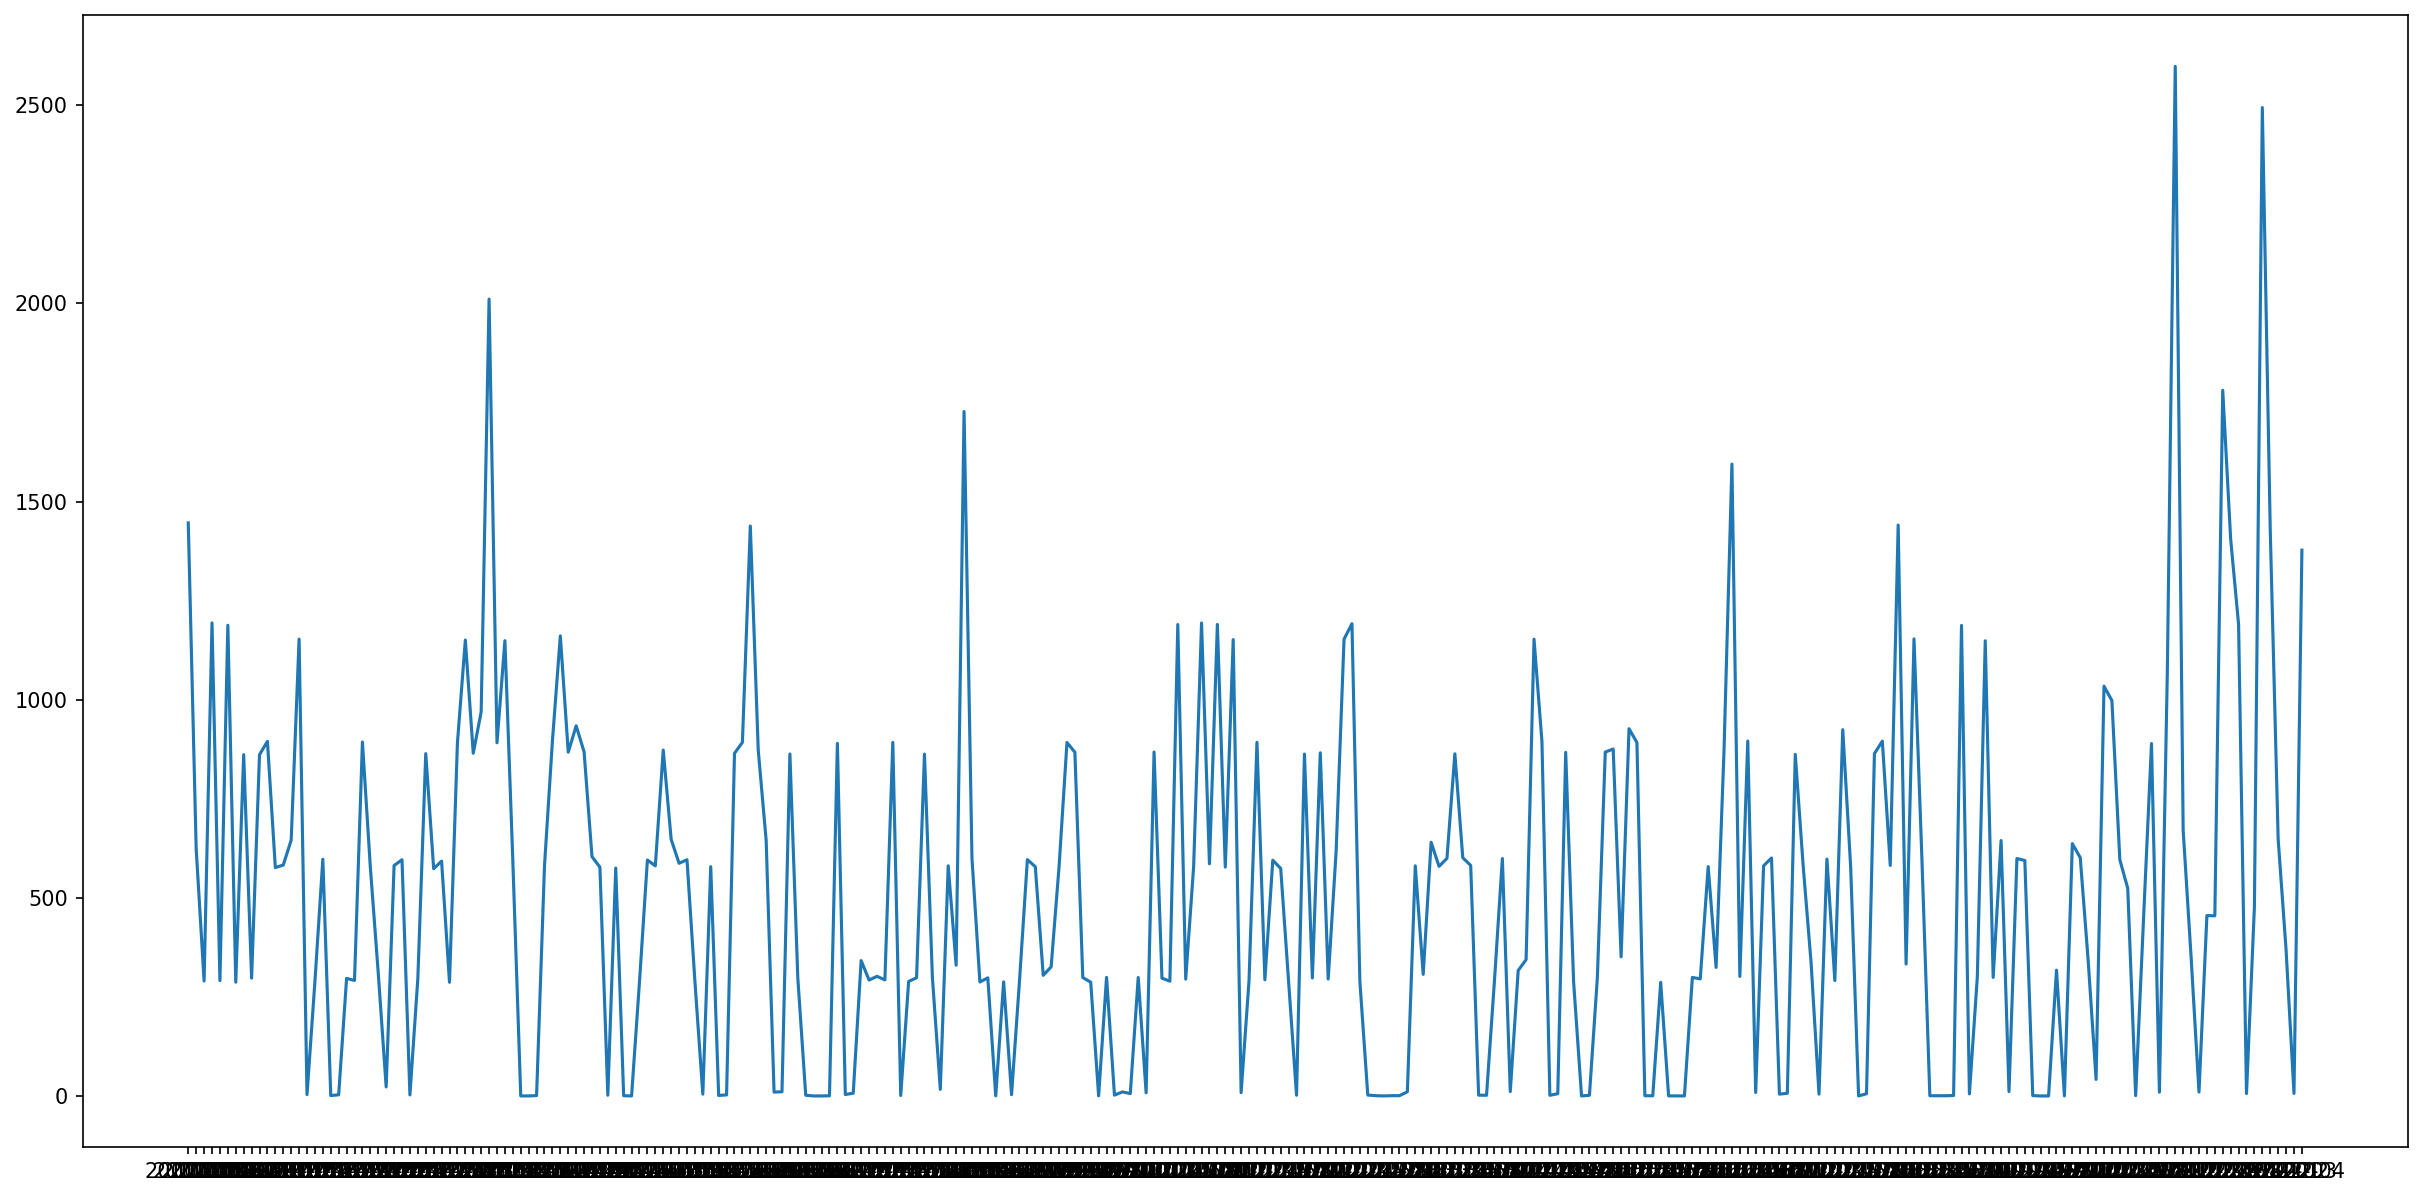

In [ ]:
plt.figure(figsize=(20, 10), dpi=150)
plt.plot(df.index, df['RR'], color='tab:blue')
plt.show()

In [ ]:
df

,RR
tahun_bulan,
2000-01,1445.958065
2000-02,623.648276
2000-03,289.945161
2000-04,1193.660000
2000-05,291.012903
...,...
2021-12,1428.944000
2022-01,648.321429
2022-02,369.032000


In [ ]:
# gunakan ini jika ingin menggunakan data test dengan 12/24 bulan terakhir

df.drop(df.tail(12).index,inplace=True)

In [ ]:
df

,RR
tahun_bulan,
2000-01,1445.958065
2000-02,623.648276
2000-03,289.945161
2000-04,1193.660000
2000-05,291.012903
...,...
2020-12,2597.945833
2021-01,670.696296
2021-02,351.570370


In [ ]:
testing

,RR
tahun_bulan,
2020-05,595.893333
2020-06,524.064706
2020-07,0.756250
2020-08,449.450000
2020-09,889.190000
2020-10,9.468182
2020-11,1070.052000
2020-12,2597.945833
2021-01,670.696296


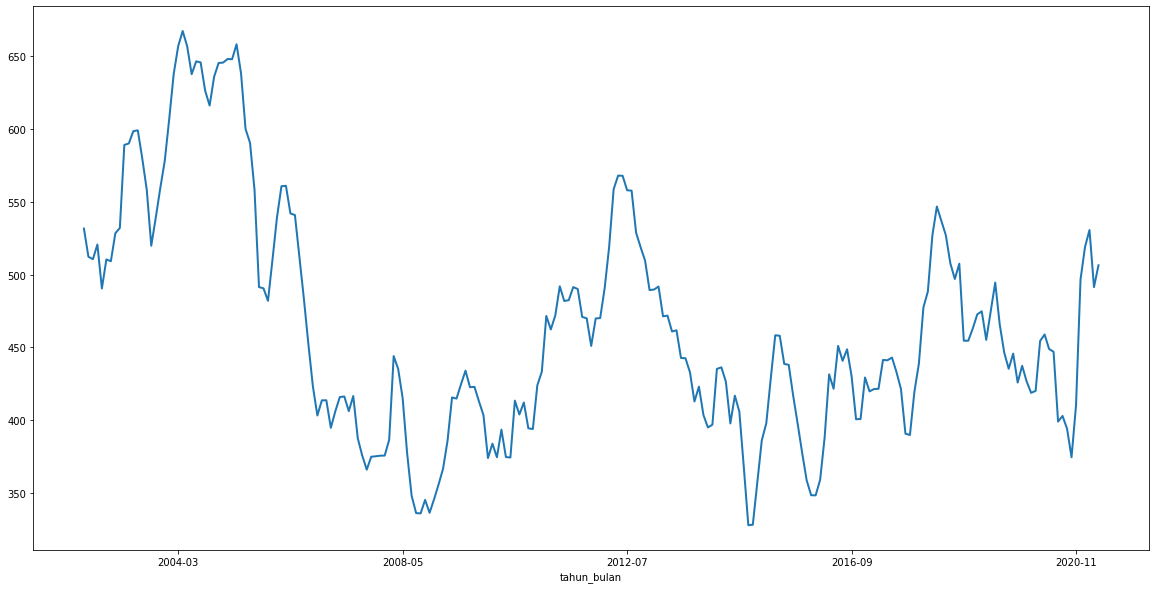

In [ ]:
avg_data = df['RR'].rolling(window=30).mean()
avg_data.plot(figsize=(20, 10), linewidth=2, color='tab:blue')

In [ ]:
df

,RR
tahun_bulan,
2000-01,1445.958065
2000-02,623.648276
2000-03,289.945161
2000-04,1193.660000
2000-05,291.012903
...,...
2020-12,2597.945833
2021-01,670.696296
2021-02,351.570370


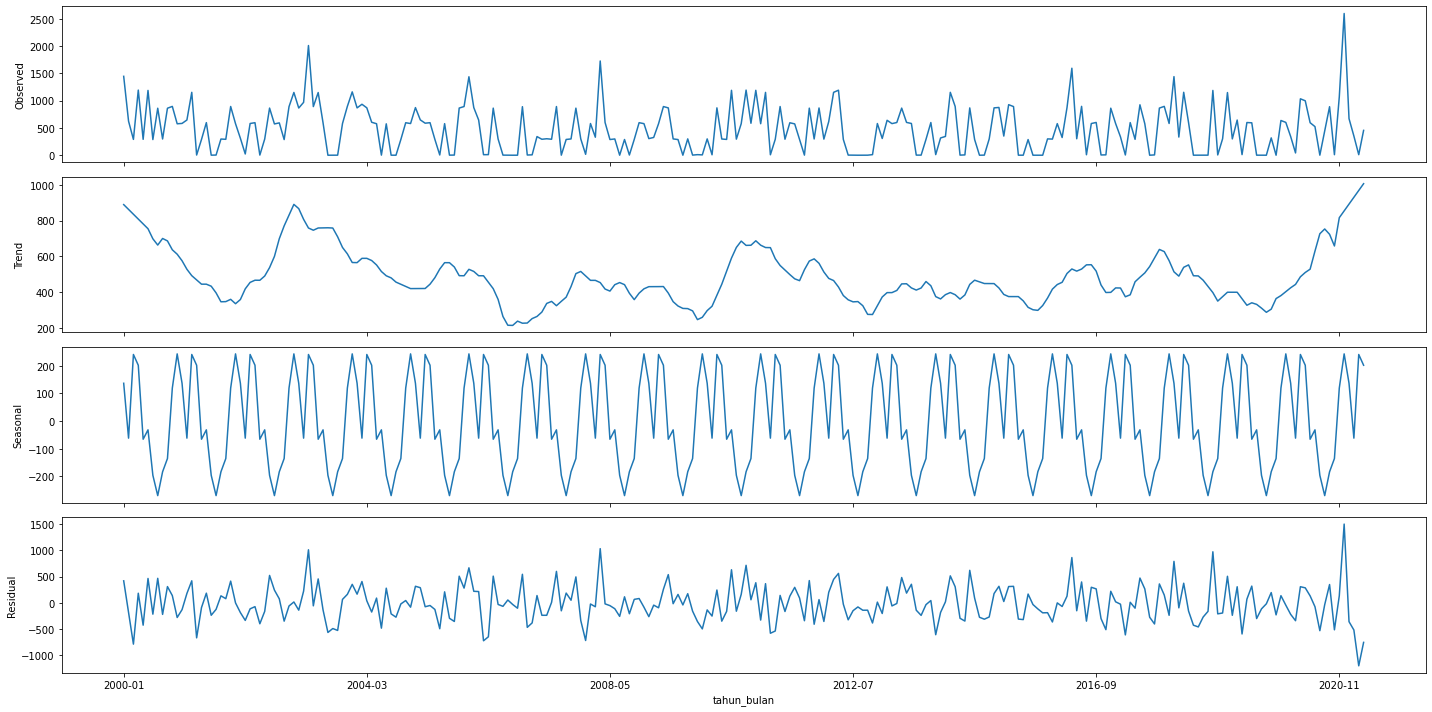

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_add = seasonal_decompose(df['RR'],
                                model='additive', extrapolate_trend='freq', freq=12)

plt.rcParams.update({'figure.figsize': (20, 10)})
result_add.plot().suptitle('', fontsize=15)
plt.show()

In [ ]:
#Forecasting With SARIMA Model

import itertools

p = d = q = range(0, 2)
#generate patterns from p,q,r
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for SARIMA..')
print('SARIMAX: {} * {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} * {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} * {}'.format(pdq[2], seasonal_pdq[2]))
print('SARIMAX: {} * {}'.format(pdq[3], seasonal_pdq[2]))

Examples of parameter combinations for SARIMA..
SARIMAX: (0, 0, 1) * (0, 0, 1, 12)
SARIMAX: (0, 0, 1) * (0, 0, 1, 12)
SARIMAX: (0, 1, 0) * (0, 1, 0, 12)
SARIMAX: (0, 1, 1) * (0, 1, 0, 12)


In [ ]:
import warnings
import statsmodels.api as sm

warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(
                df['RR'],
                order=param, seasonal_order=param_seasonal,
                enforce_stationarity=False,
                enforce_invertibility=False)
            results = mod.fit()
            print('SARIMA{}*{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)*(0, 0, 0, 12)12 - AIC:4018.1523236814196
SARIMA(0, 0, 0)*(0, 0, 1, 12)12 - AIC:3772.8115686521733
SARIMA(0, 0, 0)*(0, 1, 0, 12)12 - AIC:3763.616047377769
SARIMA(0, 0, 0)*(0, 1, 1, 12)12 - AIC:3444.7023058035775
SARIMA(0, 0, 0)*(1, 0, 0, 12)12 - AIC:3731.3685131807324
SARIMA(0, 0, 0)*(1, 0, 1, 12)12 - AIC:3627.0125000117905
SARIMA(0, 0, 0)*(1, 1, 0, 12)12 - AIC:3511.8393732177797
SARIMA(0, 0, 0)*(1, 1, 1, 12)12 - AIC:3444.1845829264666
SARIMA(0, 0, 1)*(0, 0, 0, 12)12 - AIC:3921.6172985674057
SARIMA(0, 0, 1)*(0, 0, 1, 12)12 - AIC:3710.553577319596
SARIMA(0, 0, 1)*(0, 1, 0, 12)12 - AIC:3746.7483325686176
SARIMA(0, 0, 1)*(0, 1, 1, 12)12 - AIC:3425.1807937232124
SARIMA(0, 0, 1)*(1, 0, 0, 12)12 - AIC:3715.424825619478
SARIMA(0, 0, 1)*(1, 0, 1, 12)12 - AIC:3610.070430249656
SARIMA(0, 0, 1)*(1, 1, 0, 12)12 - AIC:3504.363787743334
SARIMA(0, 0, 1)*(1, 1, 1, 12)12 - AIC:3424.2351335603325
SARIMA(0, 1, 0)*(0, 0, 0, 12)12 - AIC:3905.6390176399545
SARIMA(0, 1, 0)*(0, 0, 1, 12)12 - AI

In [ ]:
mod = sm.tsa.statespace.SARIMAX(
    df['RR'],
    order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False)
results = mod.fit()

In [ ]:
df.head(1)

,RR
tahun_bulan,
2000-01,1445.958065


In [ ]:
# disini angka 12/24 sebagai forecast berapa bulan kedepan

fcast = results.get_forecast(steps=12)

forecast = pd.DataFrame(fcast.predicted_mean)
forecast.columns = ['RR']

forecast

,RR
2021-05-01,273.126329
2021-06-01,349.471703
2021-07-01,248.491631
2021-08-01,131.679876
2021-09-01,317.714007
2021-10-01,240.088413
2021-11-01,474.888497
2021-12-01,635.471127
2022-01-01,584.247969
2022-02-01,358.209318


In [ ]:
forecast = forecast.reset_index()

In [ ]:
forecast.head(1)

,index,RR
0,2021-05-01,273.126329


In [ ]:
forecast['index'] = forecast['index'].astype(str)

In [ ]:
forecast[['tahun', 'bulan', 'tanggal']] = forecast['index'].str.split('-', expand=True)
forecast['tahun_bulan'] = forecast['tahun'] + '-' + forecast['bulan']

In [ ]:
forecast.head(1)

,index,RR,tahun,bulan,tanggal,tahun_bulan
0,2021-05-01,273.126329,2021,05,01,2021-05


In [ ]:
forecast = forecast.set_index('tahun_bulan')

In [ ]:
forecast = forecast[['RR']]

In [ ]:
forecast

,RR
tahun_bulan,
2021-05,273.126329
2021-06,349.471703
2021-07,248.491631
2021-08,131.679876
2021-09,317.714007
2021-10,240.088413
2021-11,474.888497
2021-12,635.471127
2022-01,584.247969


In [ ]:
testing

,RR
tahun_bulan,
2021-05,454.580000
2021-06,1780.764000
2021-07,1405.252632
2021-08,1190.380000
2021-09,5.968421
2021-10,477.373684
2021-11,2494.004000
2021-12,1428.944000
2022-01,648.321429


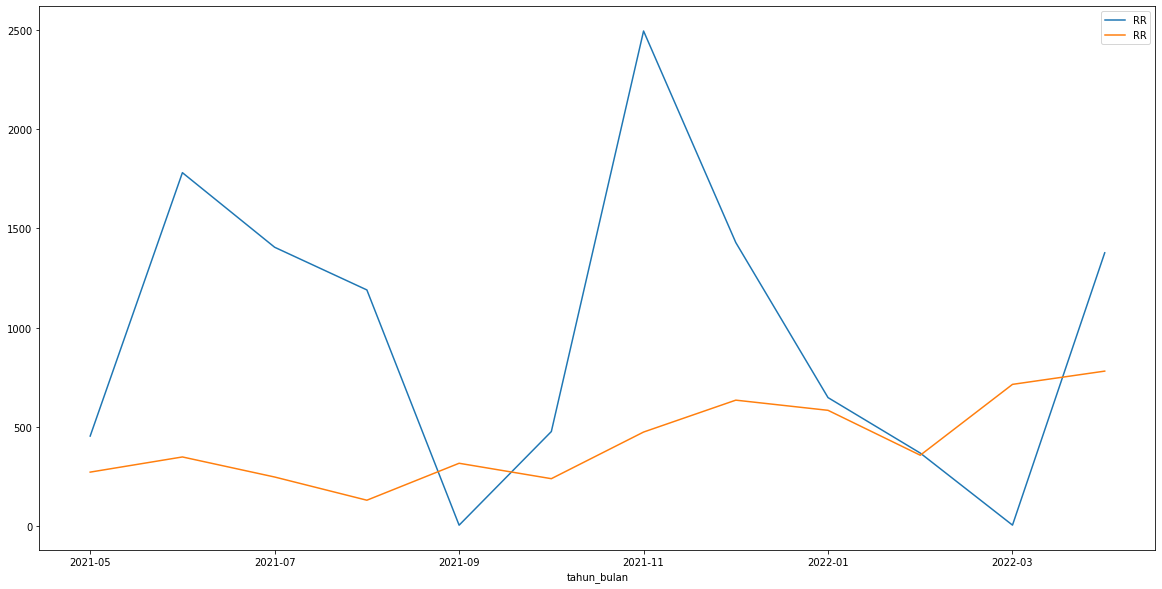

In [ ]:
# menampilkan hasil testing 12/24 bulan terakhir

ax = testing.plot()
forecast.plot(ax=ax)

In [ ]:
# cek selisih error
from sklearn.metrics import mean_absolute_error

forecast_errors = [forecast['RR'][i]-testing['RR'][i] for i in range(len(forecast))]
print('Forecast Errors: %s' % forecast_errors)

mae = mean_absolute_error(forecast['RR'],testing['RR'])
print('MAE:', mae)

In [ ]:
df

,RR
tahun_bulan,
2000-01,1445.958065
2000-02,623.648276
2000-03,289.945161
2000-04,1193.660000
2000-05,291.012903
...,...
2021-12,1428.944000
2022-01,648.321429
2022-02,369.032000


In [ ]:
hasil_fix = pd.concat([df.tail(100), forecast])

In [ ]:
hasil_fix

,RR
tahun_bulan,
2014-01,316.567742
2014-02,343.985714
2014-03,1152.638710
2014-04,894.316667
2014-05,1.677419
...,...
2022-12,1170.145531
2023-01,818.581880
2023-02,576.388345


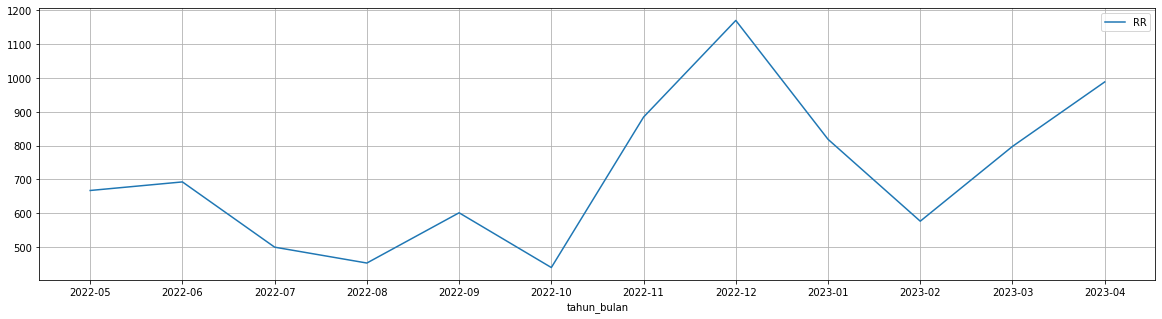

In [ ]:
forecast.plot(grid=True, figsize=(20,5))
plt.xticks(range(0,len(forecast.index)), forecast.index)
plt.show()

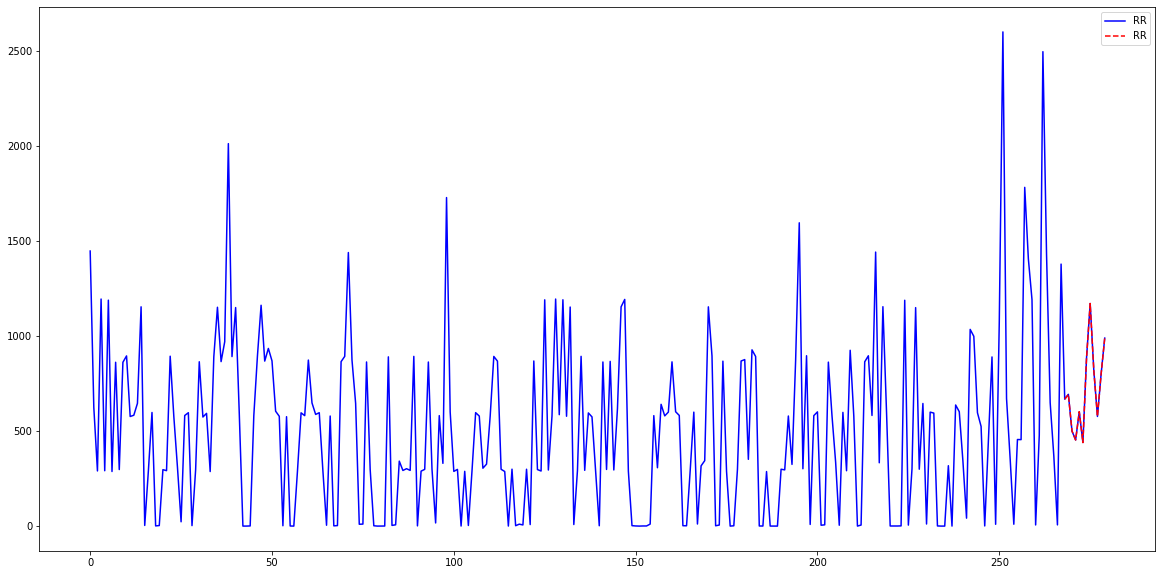

In [ ]:
hasil_fix2 = pd.concat([df, forecast])

plot_hasil = hasil_fix2.reset_index(drop=True)

ax = plot_hasil.plot(ls="-", color="b")
plot_hasil.tail(len(forecast)).plot(ls="--", color="r", ax=ax)

plt.show()

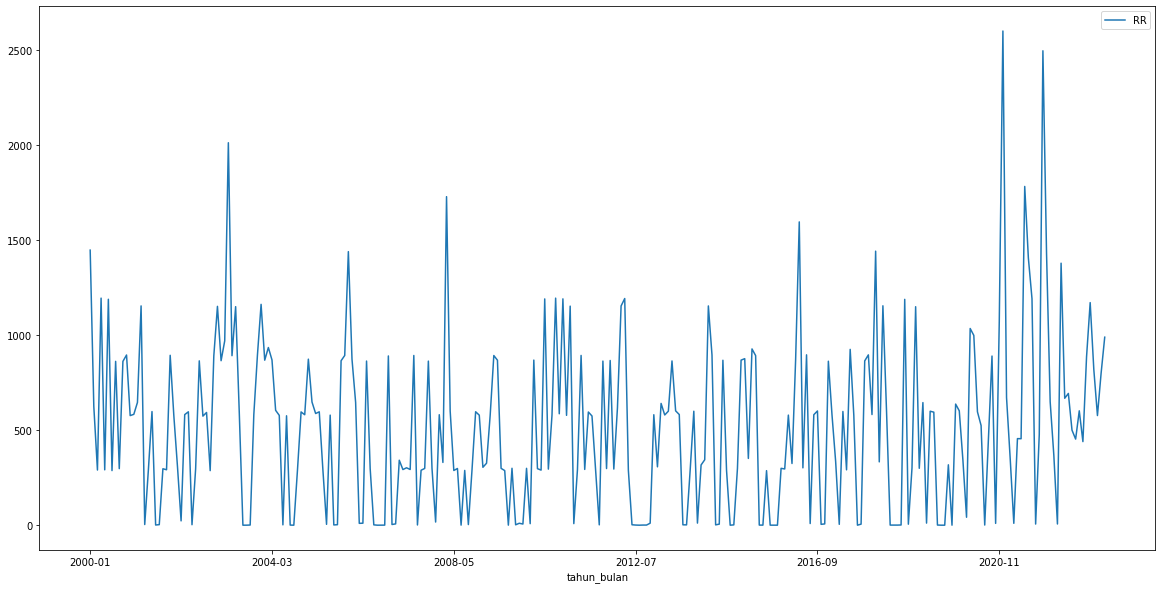

In [ ]:
hasil_fix2.plot()

# Modelling SimpleExp

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [ ]:
df_train = avg_data.iloc[:-12]
df_test = avg_data.iloc[-12:]

In [ ]:
model = HWES(df_train, seasonal_periods=12, trend='add', seasonal='mul')
fitted = model.fit()

ValueError: ignored

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(avg_data['RR'])

model = ses.fit()

In [ ]:
forecast = model.forecast(12)
forecast

2022-05-01    721.785765
2022-06-01    721.785765
2022-07-01    721.785765
2022-08-01    721.785765
2022-09-01    721.785765
2022-10-01    721.785765
2022-11-01    721.785765
2022-12-01    721.785765
2023-01-01    721.785765
2023-02-01    721.785765
2023-03-01    721.785765
2023-04-01    721.785765
Freq: MS, dtype: float64

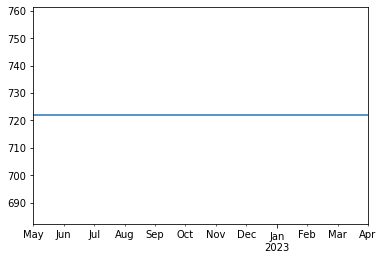

In [ ]:
forecast.plot()

In [ ]:
forecast = pd.DataFrame(forecast)
forecast.columns = ['RR']

In [ ]:
forecast

,RR
2022-05-01,721.785765
2022-06-01,721.785765
2022-07-01,721.785765
2022-08-01,721.785765
2022-09-01,721.785765
2022-10-01,721.785765
2022-11-01,721.785765
2022-12-01,721.785765
2023-01-01,721.785765
2023-02-01,721.785765


In [ ]:
hasil = pd.concat([avg_data, forecast])

In [ ]:
hasil

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
2000-01,24.193548,29.951613,26.654839,82.451613,1445.958065,1.935484,4.483871,250.161290,1.677419
2000-02,24.333333,30.300000,26.868966,82.586207,623.648276,3.041379,3.862069,255.172414,1.310345
2000-03,25.258065,31.506452,27.951613,75.741935,289.945161,3.619355,4.322581,255.806452,1.806452
2000-04,25.166667,32.513333,28.000000,78.400000,1193.660000,4.096667,3.800000,236.666667,1.133333
2000-05,25.387097,32.509677,28.393548,79.161290,291.012903,0.000000,4.032258,183.870968,1.322581
...,...,...,...,...,...,...,...,...,...
2022-12-01 00:00:00,NaN,NaN,NaN,NaN,721.785765,NaN,NaN,NaN,NaN
2023-01-01 00:00:00,NaN,NaN,NaN,NaN,721.785765,NaN,NaN,NaN,NaN
2023-02-01 00:00:00,NaN,NaN,NaN,NaN,721.785765,NaN,NaN,NaN,NaN
2023-03-01 00:00:00,NaN,NaN,NaN,NaN,721.785765,NaN,NaN,NaN,NaN


In [ ]:
hasil = hasil.reset_index(drop=True)

In [ ]:
hasil

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
0,24.193548,29.951613,26.654839,82.451613,1445.958065,1.935484,4.483871,250.161290,1.677419
1,24.333333,30.300000,26.868966,82.586207,623.648276,3.041379,3.862069,255.172414,1.310345
2,25.258065,31.506452,27.951613,75.741935,289.945161,3.619355,4.322581,255.806452,1.806452
3,25.166667,32.513333,28.000000,78.400000,1193.660000,4.096667,3.800000,236.666667,1.133333
4,25.387097,32.509677,28.393548,79.161290,291.012903,0.000000,4.032258,183.870968,1.322581
...,...,...,...,...,...,...,...,...,...
275,NaN,NaN,NaN,NaN,721.785765,NaN,NaN,NaN,NaN
276,NaN,NaN,NaN,NaN,721.785765,NaN,NaN,NaN,NaN
277,NaN,NaN,NaN,NaN,721.785765,NaN,NaN,NaN,NaN
278,NaN,NaN,NaN,NaN,721.785765,NaN,NaN,NaN,NaN


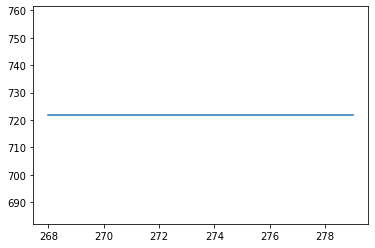

In [ ]:
hasil['RR'].tail(len(forecast)).plot()

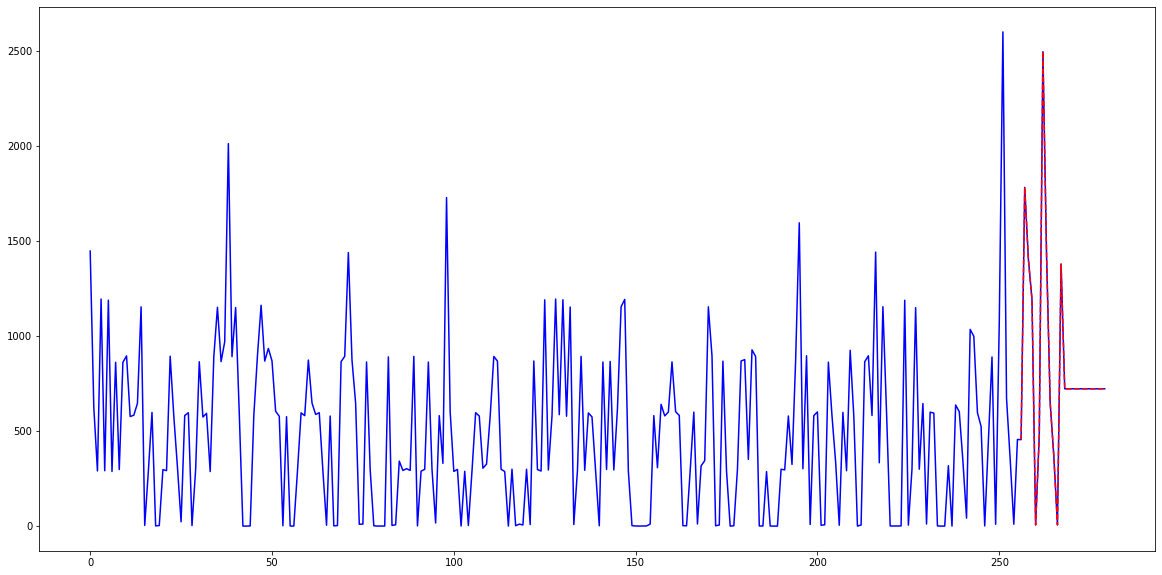

In [ ]:
ax = hasil['RR'].head(280).plot(ls="-", color="b")
hasil['RR'].tail(len(forecast)).plot(ls="--", color="r", ax=ax)

plt.show()